![title](http://ulcar.uml.edu/~iag/CS/GMDH-network.gif)

In each hemisphere of the brain, humans have a primary visual cortex, containing 140 million neurons, with tens of billions of connections between them. From this primary visual cortex, countless other cortexes process what the primary visual cortex saw, and do more image processing on their own way. At the  of all these layers, the final cortex outputs to the brain its understanding of what we are seeing. Consider the following images:

![title](http://ufldl.stanford.edu/tutorial/images/Mnist_01.png)

We can obviously see 0s at the top and 1s on the bottom. Now how does our brain identify this? Well we usually see defining patters in images that let us recognize what the object on the image is. If we see an oval then it's a 0. However, see how I just typed a 0 and it has a slash going through the middle? Well we also know that's a 0. How about 1s? We just have to look at a line with a downward tip at the top, and a horizontal line at the bottom. But is that always the case? In the images, the ones are just sticks. But maybe one person will draw a one with the shape described previously. Easily enough, when young, we learn to identify visually what 1s and 0s look like. 

Okay now try doing the same using algorithms on a computer. I'll wait... Think of all the special caveats and exceptions of the shape of a digit. Even simpler, just for 1s and 0s. Too many to count right? Now also know that you are working with images, so some people may write 1s small, others large, others side ways, others with sticks at the bottom, others without them, and so on... The problem for identifying if an image describes a 1 or a 0 just got really complicated. Now imagine the same thing but for all the digits. That's when you give up.

However, we can use the neural network machine learning model for this task. Neural networks are modeled to function similar to our brain, with neurons recieving inputs, processing it and releasing an output based on this. After processing through several neurons, one final output is given by the network, which denotes the result of the network. Let's first load the images we will use on this notebook. They contain handwritten digits from 0 to 9, but on this one we will only use those that have a 1 or a 0. 

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [267]:
digits = pd.read_csv("digits.csv")
binary_digits = digits.loc[(digits.label == 0) | (digits.label == 1)]
print(binary_digits.shape)
binary_digits.tail()

(8816, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41991,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


On this dataframe, each row represents an image, and each column represents a pixel. The collection of all pixels of the image, represents the image itself. In this case, the images are made of 28 x 28 pixels, which in turn create 784 pixels (28 x 28). Let's separate each image from each label, so that we get a nice matrix of values. We can then use our trusty display function to display the image itself.

In [268]:
labels = pd.get_dummies(binary_digits.label).values
binary_digits.drop("label",axis = 1, inplace = True)
labels

C:\Users\jununez\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


array([[0, 1],
       [1, 0],
       [0, 1],
       ..., 
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

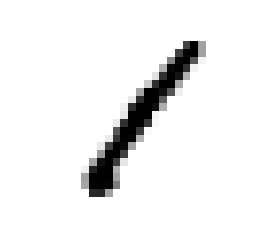

In [1205]:
image_width = image_height = 28
def Display(img,width = 28,height = 28):
    #Reshape the image into a 28x28 matrix.
    one_image = img.reshape(width,height)
    
    plt.axis('off')
    #Create a grayscale pixel array of the pixel values.
    plt.imshow(one_image, cmap=cm.binary)
    plt.show()

images = binary_digits.values
Display(images[0])

Let's also convert the pixels of our images into floating point numbers, because we'll do some calculations later with them. 

In [270]:
images= images.astype(np.float64)
images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

Now that we have this ready, let's talk about the key element of the neural network, the neurons.

## Neurons

As I mentioned previously, even in our brain, a neuron is a unit that takes several inputs, and based on some internal processing of the neuron, and relevant output is "fired" or not. In the case of our brain, these are electrical impulses that are transferred from neuron to neuron (neuroscientists please correct me if you read this ;) ). In programming it's a little bit different. Functions are made to output something, even when no return statement is specified, as they will output none if called with no return statement.

In [271]:
def toproveapoint():
    a = "wow"

print(toproveapoint())

None


In our case, we take numbers as inputs (which in turn represent something altogether), and output other numbers. So if a neuron were to not "fire" we would just output a 0 or something of that sort. Let's see an example with going to the movies on a night. You would consider several factors like: What movie is on premier, how many friends are available to go with you, and how much money do you have. So let's say that you don't like to go alone, but you don't mind that if there's a movie you really want to watch. So let's say that the movie factor has a weight of 2, and the friends factor a weight of 1. However, since without money you can't go to the movies, money takes the highest weight when making the decision. However, you are an avid moviegoer, so you are likely to say yes anyway. This is the bias of the decision factor. If you are keeping count then:

$(1 * Friends to go with)  + (2 * MovieOnPremier) + (3 * HaveMoney) + (MoviegoerBias) = HowLikelyToGoMovies $

Since we want a probability of how likely you are to go to the movies, you would want a function that outputs a number between 0 and 1. So let's say our previous equation is $\sigma$. One function that would output a number between 1 and 0 is the sigmoid function.

$S(\sigma)  = \dfrac{1}{1 + e^{-\sigma}} $

But hold on, this is looking familar. Like logistic regression!

On neural networks, each neuron takes inputs and outputs, performs a dot product between the inputs, and weight + bias, then takes the result of that into an **activation function**, which then produces and output. An activation function does not necessarily have to be the sigmoid function. For example, if the result of $\sigma$ is a really negative number, then the sigmoid function will output a really low number, which updates the parameters in a really small fashion. This way, the model is "stuck" training, because it's updating really slowly. One other activation function we can use is the hyperbolic tangent or **tanh**.

$tanh(x) = \dfrac{sinh(x)}{cosh(x)}$

$tanh(x) = \dfrac{e^x - e^{-x}}{e^x + e^{-x}}$

$tanh(x) = \dfrac{2}{1 + e^{-2x}} - 1$

This function outputs values between -1 and 1.

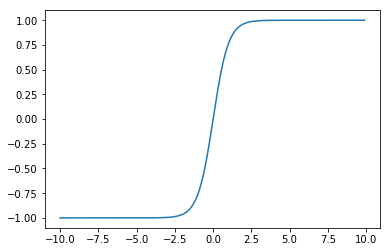

In [272]:
def tanh(x):
    denominator = 1 + np.exp(-2*x)
    return (2)/denominator -1

x = np.arange(-10,10,0.1)
y = tanh(x)
plt.plot(x,y)
plt.show()

This function outputs values near -1 when the input is  really negative, and values near 1 when the input is really positive and values near 0 when the output is near 0. Thus, to get the same output as the sigmoid function, we just need to positive outputs to 1 and negative outputs to 0. Simple stuff, however this whill help us later on when defining other concepts. So now we have the general structure of a neuron ready. To summarize, we apply a dot product between the input vector X and the weights w. We add the bias b to the result of that product. We then pass the product through an activation function, which produces an output y (Very similar process to the one from Logistic Regression).

![title](https://blogs.cornell.edu/info2040/files/2015/09/VqOpE-1c4xc4y.jpg)

Now that we have how the neurons of our neural network function, let's go over the architecture of a neural network.

## Neural Network Architecture.

A neural network is divided into several **layers**, where most neural networks have a minimum of 3 layers: an input layer, a hidden layer and an output layer. All neural networks have input and output layers, where the number of neurons is as big as the number of inputs in the layer, and the output layer is represented either as one neuron which outputs the final label, a layer of size c, where c is the number of unique labels. In between those there are hidden layers. They may sound mysterious, but they really mean that they are not either an input layer or an output layer. These hidden layers perform logistic regression on their own, and learn more complex features than their previous counterparts. Let's say that in the first layer, the neurons that are activated when friends to go with and have money. On the hidden layer, a neuron would learn a more complex feature from this, like having money + friends, but no good movies on primer + low bias. These neurons on the hidden layer would have their own weights and biases as well. This would go on and on , until we are at the final output layer, with its own weights and biases. The output of the network depends on this final calculation. The forward passing of the outputs of the outputs of the neural network makes it a **feedforward network**. This network will go from layer to layer, passing their outputs to the next layer, and then output the final class. 

![title](http://neuralnetworksanddeeplearning.com/images/tikz11.png)

These regular layers that perform their activation function and regular dot product are called **layers**. Let's define their properties on a class (if you are a bit lost on classes, read notebook 1.7).

In [1268]:
class Layer(object):
    
    def __init__(self, Weights,biases):
        self.X = None #Define the X matrix input values later, since they aren't made when creating the layer.
        self.y_prediction = None #The output of the layer.
        self.Weights = Weights
        self.biases = biases
    
    #Activation function.
    def tanh(self,x):
        denominator = 1 + np.exp(-2*x)
        return (2)/denominator -1
        
    #Forward passing. Perform Dot product between input and weights. Then add biases. Finally, pass through activation.
    def forward(self,X,output = False):
        y_prediction = np.add(np.dot(X,self.Weights),self.biases)
        y_prediction = self.tanh(y_prediction)
        self.X = X
        self.y_prediction = y_prediction
        return y_prediction
    


Just so we are clear, we defined an activation function, the forward function and the initialization of layers. We can now use this class to define several layers on a network. Let's now create a neural network made with 3 layers: an input layer, a hidden layer and an output layer.

- The input layer will take the 784 input pixels and return 100 outputs. 

- The hidden layer will take the 100 outputs of the input layer and return 10 outputs. 

- The output layer will the 10 outputs and return 2 outputs, representing the number of classes.

Each layer will have a number of neurons equal to the number of inputs. Also, each layer's weights will have a dimension (Number of inputs,number of outputs) and a bias dimension of (number of outputs). These weights and biases will be initialized with random numbers. Let's see this in action now:

In [1269]:
#Input layer
np.random.seed(87)

input_weight =np.random.randn(784,100)/100 #Input layer weights dimension 784 pixels 100 outputs.
input_bias = np.random.randn(100)/100 #Input layer bias dimension
input_layer = Layer(input_weight,input_bias)
input_weight.shape

(784, 100)

In [1270]:
#Hidden layer
hidden_weight = np.random.randn(100,10)/100 #Hidden layer weights dimension 100 inputs 10 outputs.
hidden_bias = np.random.randn(10)/100 #Hidden layer bias dimension.
hidden_layer = Layer(hidden_weight,hidden_bias)
hidden_weight.shape

(100, 10)

In [1271]:
#Output Layer
output_weight = np.random.randn(10,2)/100 #Output layer weights dimension 10 inputs and 2 class output.
output_bias = np.random.randn(2) /100
output_layer = Layer(output_weight,output_bias)
output_weight.shape

(10, 2)

We'll also define a cross entropy "layer" after the output layer. While not a layer in the network itself, it will be used to provide the final output of the model, and the loss of the prediction as well. This is done first by applying **softmax** normalization, to convert the output of our final layer into the probability that each index is the label at hand. For example, if after applying softmax, the value of the output layer is [0.491,0.509], then the final predicted value is 1, because the maximum value of the array is at index 1. However, having the output this way helps us model our error in a much better fashion, by just applying the difference between them.

In [1272]:
class Cross_Entropy_Layer(object):
    
    def __init__(self):
        self.cost_entropy = None
        self.y_predict = None
        self.y = None
        
    def softmax_normalization(self,x):
        e = np.exp(x)
        s = e.sum(axis=1)
        s_reshape = np.repeat(s, x.shape[1]).reshape(x.shape)
        return e/s_reshape
    
    
    def forward(self,y_predict,y):
        self.y_predict = self.softmax_normalization(y_predict)
        self.y = y
        
        mult = np.multiply(y,np.log(self.y_predict))
        self.cost_entropy = - np.sum(mult)
        return self.y_predict

In [1273]:
cost_entropy = Cross_Entropy_Layer()

Now that we have defined our layers, let's train the network by passing forward the data through the network.

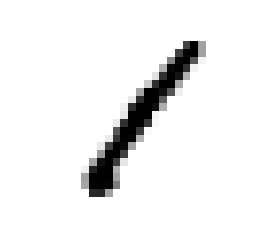

Probabilites for each label : [[ 0.49968246  0.50031754]]
Prediction = 1


In [1274]:
test_image = images[0]

input_pred = input_layer.forward(test_image)
hidden_pred = hidden_layer.forward(input_pred)
output_pred = output_layer.forward(hidden_pred).reshape(-1,2) #Reshape into a 2d array
final_prediction = cost_entropy.forward(output_pred,labels)
Display(test_image)
print("Probabilites for each label : " +str(final_prediction))
print("Prediction = {}".format(np.argmax(final_prediction)))

In [1276]:
def Score(images):
    predictions = []
    for image in images:
        input_pred = input_layer.forward(image)
        hidden_pred = hidden_layer.forward(input_pred)
        output_pred = output_layer.forward(hidden_pred).reshape(-1,2)
        final_prediction = cost_entropy.forward(output_pred,labels)
        predictions.append(final_prediction.ravel())#Convert it into a 1D array
    
    real_values = np.argmax(labels,axis = 1)
    predicted_values = np.argmax(np.asarray(predictions),axis = 1)
    accuracy = np.sum(np.equal(real_values,predicted_values))/ labels.shape[0]
    return accuracy * 100
    
print("Accuracy of model was {}%".format(Score(images)))

Accuracy of model was 89.24682395644284%


The accuracy is great, however the model is very volatile. If you don't believe me, just try changing the random seed! Remember that on previous models, to optimize them we would compare the predictions of the model with the actual output, and update the parameters based on Gradient Descent. However, two problems arise with this on Neural Networks:

1. The only output that recieves feedback from the actual predictions is the final layer. Thus, the other layers don't know how right or wrong they are.

2. Gradient Descent uses the final output to update the parameters. Neural Networks take a long time just to do one training round, and gradient descent would take too much time.

To solve problem 2 we will implement **Stochastic Gradient Descent**. This is a variation of Gradient Descent where the parameters,in this case the weight and bias, are updated per training example, instead of waiting for the whole training procedure to be finished. In practice, batches of training examples are used instead of single training examples. To solve problem 1, we'll use the **Backpropagation** algorithm.

## Backpropagation

Backpropagation is based on the chain rule from differential Calculus. Remember that the gradient of a function is found by calculating the partial derivatives of the function. The chain rule states that the derivative of a composite function, or a function with a variable that depends on another variable, is the derivative of the second function, multiplied by the derivative of the first function and the second function:

![title](https://wikimedia.org/api/rest_v1/media/math/render/svg/075ea30eb4897a37e57bd9ac7bd6a097a1f42167)

Now what does this have to do with our network? Well the error of the final output layer is just one number. Each layer has different weights to update, and different dimensions. And thus the calculation of the gradient is different for each of them. However, the output of each layer is a function in itself. So to pass the error for the parameter in an equivalent way, and to calculate the gradient, we need to transform the error to the shape of the weights of each layer. Since the input of the next layer is dependent on the output of the layer previous layer, this makes the gradient of each layer, a function that depends on the layer before it, thus making it a composite function.

![title](https://qph.ec.quoracdn.net/main-qimg-7bdfcff266211a74a31bfcdcc99c0087)


To do all this, we need to modify our Linear Layer and Cross Entropy class to include backpropagation. This will take the error of the previous layer, and reshape it to the current layer by multiplying it by the weight of the layer. We need to calculate two errors:

- The error of the activation function. This is calculated by taking the derivative of the activation function and multiplying it by the error of the previous layer. In this casE:

    $ \Delta a = tanh'(x) \cdot \delta = (1 - tanh^2(x)) \cdot \delta$
    
- The error of the weighted sum. This is calculated by multiplying the error of the activation function and multiplying it by the weight transpose vector of the current layer. This error is the one being sent to the next layer before it:

    $ \Delta y = \Delta a \cdot W^{t}_i $

We also calculate the derivative of the Weight and Bias parameters. The derivative of the weights is the transpose of its input (in these cases it's the activation function of the layer previous to it during forward propagation) multiplied by the activation error. For the bias, it's the sum of the activation error. We repeat this procedure for all layers except the input layer, passing the error from the last layer, all the way to the second layer. To do this, we'll need to change our Linear Layer and Cross Entropy class to include the backpropagation function. For  regular layers, the backward procedure recieves the error of the previous layer, calculates the derivative of the activation function which was stored during the forward procedure, calculates the error of the activation function, and calculate the derivatives for the weight and bias.Then, we calculate the error of the weighted sum, which we will pass to the next layer. Finally, we call the Stochastic Gradient Descent procedure, which updates the weight and bias based on the Linear Regression parameter update, which is the learning rate divided by the number of examples multiplied by the gradient.

In [1283]:
class Layer(object):
    
    def __init__(self, Weights,biases,learning_rate = 0.001):
        self.X = None #Define the X matrix input values later, since they aren't made when creating the layer.
        self.y_prediction = None #The output of the layer.
        self.activation = None
        self.Weights = Weights
        self.biases = biases
        self.learning_rate = learning_rate
        self.dX = None #Error of the layer.
        self.dW = None #Derivative of the weights.
        self.db = None #Derivative of the bias.
    
    #Activation function.
    def tanh(self,x):
        denominator = 1 + np.exp(-2*x)
        return (2)/denominator -1
    
    #Derivative of the activation function
    def tanh_prime(self,x):
        return 1 - x**2
    
    #Forward passing. Perform Dot product between input and weights. Then add biases. Finally, pass through activation.
    def forward(self,X):
        y_prediction = np.add(np.dot(X,self.Weights),self.biases)
        self.activation = self.tanh(y_prediction)
        self.X = X
        return y_prediction
    
    #Backpropagation. dy means the error of the previous layer and dX is the error of the currenct layer.
    def backward(self, dy):
        activation_derivative = self.tanh_prime(self.activation)
        activation_error = np.multiply(dy,activation_derivative)
        self.dW = np.dot(self.X.T,activation_error)
        self.db = np.sum(activation_error,axis = 0)
        dX = np.dot(activation_error,self.Weights.T)
        self.SGD()
        return dX

    
    def SGD(self):
        self.Weights -=  (self.learning_rate/self.X.shape[0]) * self.dW
        self.biases  -=  (self.learning_rate/self.X.shape[0]) * self.db
    

For the cross entropy layer, the backward procedure just returns the difference between the prediction during the forward procedure and the ground truth of the labels. This is then passed to the previous layer in the network.

In [1284]:
class Cross_Entropy_Layer(object):
    
    def __init__(self):
        self.cost_entropy = None
        self.y_predict = None
        self.y = None
        
    def softmax_normalization(self,x):
        e = np.exp(x)
        s = e.sum(axis=1)
        s_reshape = np.repeat(s, x.shape[1]).reshape(x.shape)
        return e/s_reshape
    
    
    def forward(self,y_predict,y):
        self.y_predict = self.softmax_normalization(y_predict)
        self.y = y
        
        mult = np.multiply(y,np.log(self.y_predict))
        self.cost_entropy = - np.sum(mult)
        return self.y_predict
    
    def backward(self):
        return self.y_predict - self.y
    

Let's initialize the network once more.

In [1288]:
input_weight =np.random.randn(784,100)/100 #Input layer weights dimension 784 pixels 100 outputs.
input_bias = np.random.randn(100)/100 #Input layer bias dimension
input_layer = Layer(input_weight,input_bias)

hidden_weight = np.random.randn(100,10)/100 #Hidden layer weights dimension 100 inputs 10 outputs.
hidden_bias = np.random.randn(10)/100 #Hidden layer bias dimension.
hidden_layer = Layer(hidden_weight,hidden_bias)

output_weight = np.random.randn(10,2)/100 #Output layer weights dimension 10 inputs and 2 class output.
output_bias = np.random.randn(2) /100
output_layer = Layer(output_weight,output_bias)

cost_entropy = Cross_Entropy_Layer()

And finally, let's do a more advanced training procedure for the network. This time we will train the network for several epochs, just like we used to do on Gradient Boosting. We are also going to divide the images into **batches**. This way we only apply gradient descent once for each layer, on each batch. This is also called **Batch Gradient Descent**. On each epoch we will randomize the dataset so we get a different order of batches. Since SGD updates per batch, the order of the batches makes a difference on the parameter updates. On each batch we perform the forward and backward procedure, and we shuffle the batches on each epoch. For batch size we will use 100 images, but this depends on you. Without further ado:

In [1289]:
np.random.seed(None)
batch_size = 100
epochs = 10
size = len(images)
print("Training Accuracy for epoch {} : {}%".format(0,Score(images)))
for e in range(epochs):
    print("Training epoch {}".format(e+1))
    indices = np.random.permutation(size)
    X_random = images[indices]
    y_random = labels[indices]

    for i in range(size // batch_size):
        image_batch = X_random[i * batch_size : (i + 1) * batch_size]
        label_batch = y_random[i * batch_size : (i + 1) * batch_size]
        
        #Feed forward
        input_forward  = input_layer.forward(image_batch)
        hidden_forward = hidden_layer.forward(input_forward)
        output_forward = output_layer.forward(hidden_forward)
        final_prediction = cost_entropy.forward(output_forward,label_batch)
        
        #Feed backward
        final_back = cost_entropy.backward()
        output_back = output_layer.backward(final_back)
        hidden_back = hidden_layer.backward(output_back)
    
    print("Training Accuracy for epoch {} : {}%".format(e + 1,Score(images)))
        
        
        

Training Accuracy for epoch 0 : 47.311705989110706%
Training epoch 1
Training Accuracy for epoch 1 : 99.6483666061706%
Training epoch 2
Training Accuracy for epoch 2 : 99.72776769509983%
Training epoch 3
Training Accuracy for epoch 3 : 99.76179673321234%
Training epoch 4
Training Accuracy for epoch 4 : 99.79582577132487%
Training epoch 5
Training Accuracy for epoch 5 : 99.8185117967332%
Training epoch 6
Training Accuracy for epoch 6 : 99.8185117967332%
Training epoch 7
Training Accuracy for epoch 7 : 99.8185117967332%
Training epoch 8
Training Accuracy for epoch 8 : 99.8185117967332%
Training epoch 9
Training Accuracy for epoch 9 : 99.84119782214155%
Training epoch 10
Training Accuracy for epoch 10 : 99.84119782214155%


Great! We now get an excellent training accuracy by optimizing the parameters of the network. Let's take a look at what happens inside the network for each layer by printing the input that goes through each layer.

Original Image


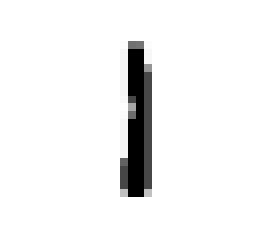

1st Layer


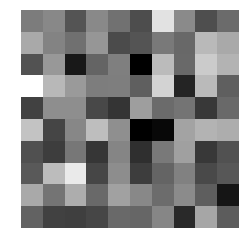

2nd layer


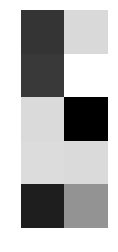

3rd layer


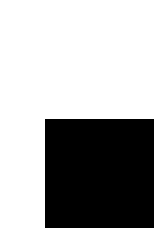

Prediction:
1


In [1296]:
def Display_Image_Net(index):
    test = images[index]
    print("Original Image")
    Display(test)
    input_forward  = input_layer.forward(test)
    print("1st Layer")
    Display(input_forward,width = 10,height = 10)
    hidden_forward = hidden_layer.forward(input_forward)
    print("2nd layer")
    Display(hidden_forward,width = 5,height = 2)
    print("3rd layer")
    output_forward = output_layer.forward(hidden_forward)
    Display(output_forward,width = 2,height = 1)
    print("Prediction:")
    final_prediction = cost_entropy.forward(output_forward.reshape(-1,2),labels[index])
    print(np.argmax(final_prediction))
    
Display_Image_Net(2)

We can see that the layers receive less and less pixels as we go along through the network. In the end we only recieve two pixels, a black one and a white one. The one in black represents the final label for the image. Since our network didn't get 100% accuracy, let's see which images it missed.

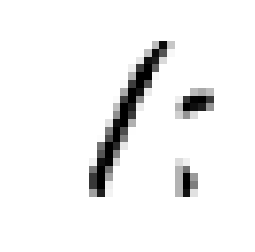

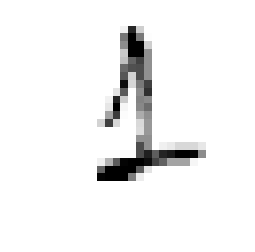

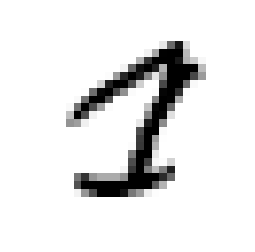

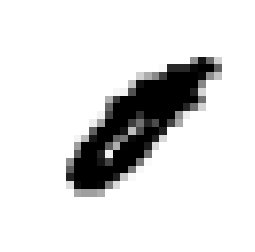

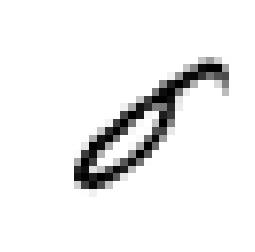

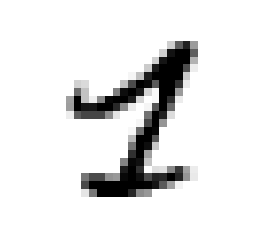

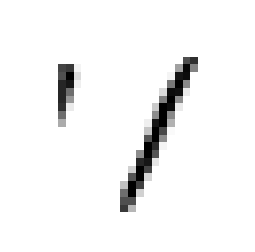

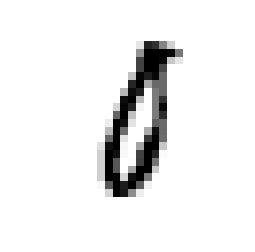

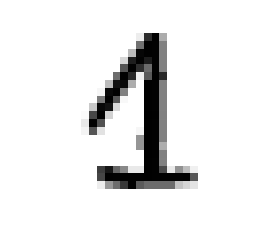

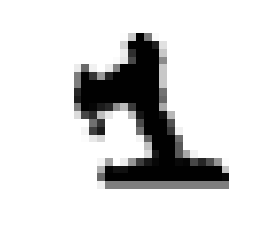

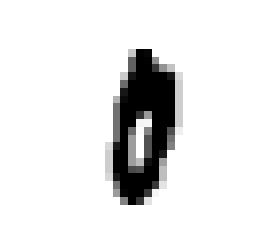

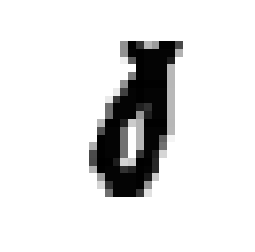

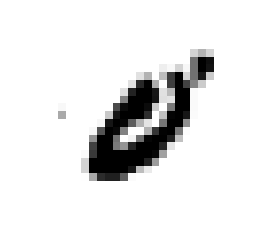

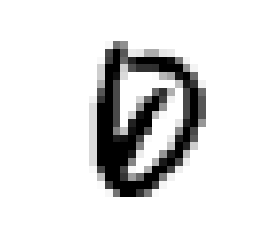

In [1302]:
def Wrong_indexes(images):
    predictions = []
    for image in images:
        input_pred = input_layer.forward(image)
        hidden_pred = hidden_layer.forward(input_pred)
        output_pred = output_layer.forward(hidden_pred).reshape(-1,2)
        final_prediction = cost_entropy.forward(output_pred,labels)
        predictions.append(final_prediction.ravel())#Convert it into a 1D array
    
    real_values = np.argmax(labels,axis = 1)
    predicted_values = np.argmax(np.asarray(predictions),axis = 1)
    wrong_values = np.logical_not(np.equal(real_values,predicted_values))
    return np.argwhere(wrong_values)

wrong_indexes = Wrong_indexes(images).ravel()
for index in wrong_indexes:
    Display(images[index])

As you can see, these images are the weirdest out of the bunch, so it's no wonder they could get misclassified. So hopefully, by now you have an intuition about how neural networks work, and how they are optimized. In the next notebook we are going to see more tricks with neural networks, and classify more than two digits.